# 2.1 Dendrograms on Entire Weather Dataset

### Contents:
1. Install Libraries
2. Import Libraries
3. Import Datasets
4. Dendrograms on Merged Data
   - Select year (2020) & Scale
   - Conduction Initial Dendrograms
   - Plot Clusters of Complete Linkage Method
5. Run PCA
   - For 1 and 2 Components
6. Reduce Datasets
   - Reduce to Mean Temp Variables
   - Reduce to 2 Stations
7. Export Reduced Datasets

## 1. Install Libraries

## 2. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## 3. Import Datasets

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
path = os.getcwd()
path

'/Users/kirstencurrie/ClimateWins Analysis/02 Scripts'

In [11]:
path = '/Users/kirstencurrie/ClimateWins Analysis'

In [18]:
#Read in the European weather data.
df = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
df.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.0,0,0.8,-0.3,1.6,7,0.91,1.001,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.2,0.1,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [20]:
#Read in pleasantness rating dataset
pleasant = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Initial Dendrograms

#### Select Year (2020) & Scale

In [22]:
#Convert Date column to date/time column
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

In [24]:
#Reduce your dataset to a single year
df_2020 = df[df['DATE'].dt.year == 2020]
df_2020.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,2020-01-01,1,0,1.7,0.87,1.0339,0.64,0.0,0,6.5,-0.4,-3.4,3.2,2,0.68,1.0333,0.36,0.0,0.9,2.0,-1.4,5.4,4,0.67,1.017,1.41,0.0,5.4,3.8,1.7,7.5,8,2.7,0.99,1.0318,0.77,0.0,0.0,0.8,-0.2,1.8,1,4.0,0.86,1.0333,0.21,0.0,0,5.4,1.3,-1.2,3.7,4,0.0,0.0,0,2.3,-2.0,5.7,7,0.9,1.0293,0.13,0.0,0,0.0,4.9,1.7,11.0,2.4,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1,1,0.5,0.78,1.0361,0.74,0.0,6.7,-0.6,-4.4,5.6,5,1.9,0.99,1.032,0.37,0.0,2.7,-0.6,-3.2,2.9,1,0.3,0.68,1.0326,1.12,0.0,8.7,6.6,1.9,11.2,2,0.83,0.73,0.0,0,7.6,0.8,-2.6,4.9,7,2.2,0.81,1.0163,0.06,0.0,0,0.0,1.9,-1.8,3.8,3,1.7,0.73,1.0152,7.1,15.4,0,10.2,0.36,1.0465,0.32,0.0,8.5,-6.1,-8.4,-3.8,5,1.0125,1.11,0.0,0.0,3.5,1.2,5.2,3.2,1.0,1.0295,0.88,0.24,6.1,3.5,8.7,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [26]:
#Drop date & month columns
df_2020_2 = df_2020.drop(['DATE', 'MONTH'], axis=1)
df_2020_2.head(1)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,0,1.7,0.87,1.0339,0.64,0.0,0,6.5,-0.4,-3.4,3.2,2,0.68,1.0333,0.36,0.0,0.9,2.0,-1.4,5.4,4,0.67,1.017,1.41,0.0,5.4,3.8,1.7,7.5,8,2.7,0.99,1.0318,0.77,0.0,0.0,0.8,-0.2,1.8,1,4.0,0.86,1.0333,0.21,0.0,0,5.4,1.3,-1.2,3.7,4,0.0,0.0,0,2.3,-2.0,5.7,7,0.9,1.0293,0.13,0.0,0,0.0,4.9,1.7,11.0,2.4,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1,1,0.5,0.78,1.0361,0.74,0.0,6.7,-0.6,-4.4,5.6,5,1.9,0.99,1.032,0.37,0.0,2.7,-0.6,-3.2,2.9,1,0.3,0.68,1.0326,1.12,0.0,8.7,6.6,1.9,11.2,2,0.83,0.73,0.0,0,7.6,0.8,-2.6,4.9,7,2.2,0.81,1.0163,0.06,0.0,0,0.0,1.9,-1.8,3.8,3,1.7,0.73,1.0152,7.1,15.4,0,10.2,0.36,1.0465,0.32,0.0,8.5,-6.1,-8.4,-3.8,5,1.0125,1.11,0.0,0.0,3.5,1.2,5.2,3.2,1.0,1.0295,0.88,0.24,6.1,3.5,8.7,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [28]:
#create scaler object
scaler = StandardScaler()

In [30]:
#Scale weather data
df_scaled = pd.DataFrame(scaler.fit_transform(df_2020_2), 
                         columns=df_2020_2.columns,
                         index=df_2020_2.index)
df_scaled.head(10)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,-1.822856,-1.817976,-1.721519,-0.615615,1.110223e-16,1.983293,-2.293811,-0.320358,-1.146207,-1.532505,-1.609425,-1.417438,0.0,0.0,2.220446e-16,0.0,-0.327325,1.776357e-15,-1.199888,-1.093964,-1.164965,0.940837,-0.572478,1.734871,1.618151,-0.418026,-0.553697,-1.150870,-1.958230,-1.437623,-2.058325,-1.783191,-0.181045,0.971902,1.779045,-1.075058,-0.467633,0.0,0.094357,-1.783855,-1.529908,-1.729325,-0.322350,-0.983512,-0.315409,-0.070302,-1.206158,-1.428342,-1.085754,0.862301,1.201357,1.329640,-1.231654,-0.455483,0.0,-1.033905,-1.381399,-1.345670,-0.867613,4.440892e-16,2.220446e-16,2.220446e-16,-2.220446e-16,-2.775558e-17,0.0,1.776357e-15,1.776357e-15,3.552714e-15,-1.524940,-0.946485,0.537192,2.160916,-0.

#### Conduct Initial Dendrograms

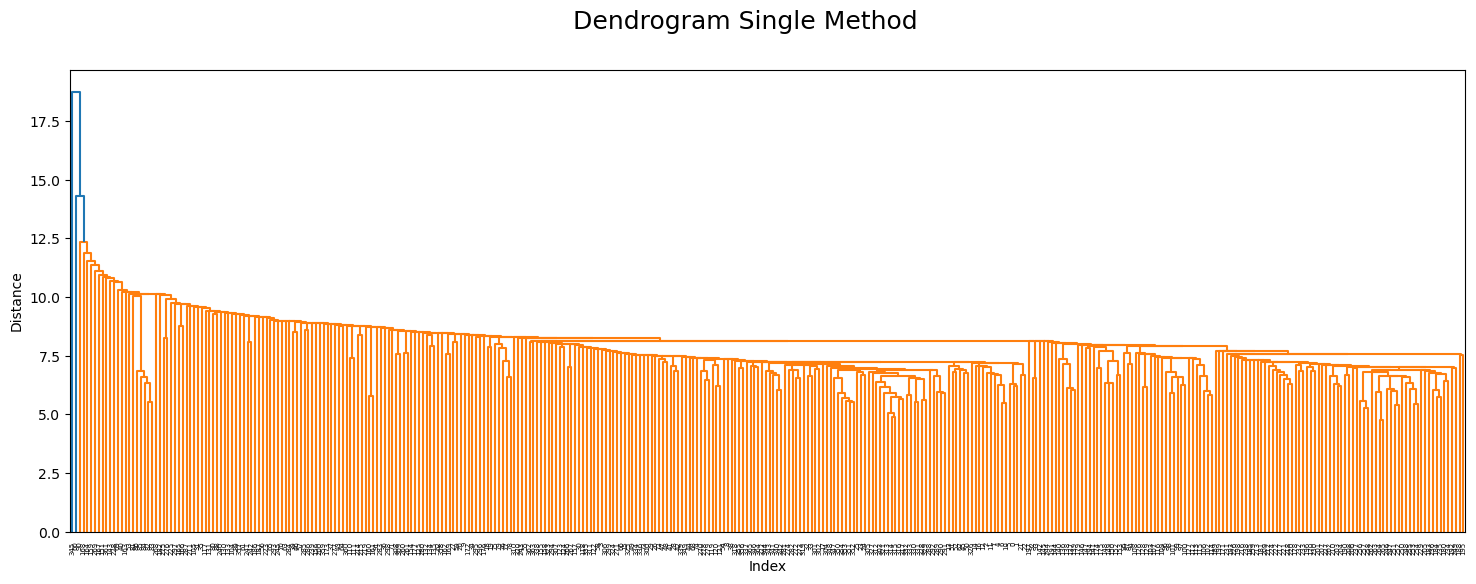

In [33]:
distance_single = linkage(df_scaled,method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

##### The single method finds the distance between two closes points within a cluster to determine which group they belong to. Using the single method on the merged dataset, we get only one group.

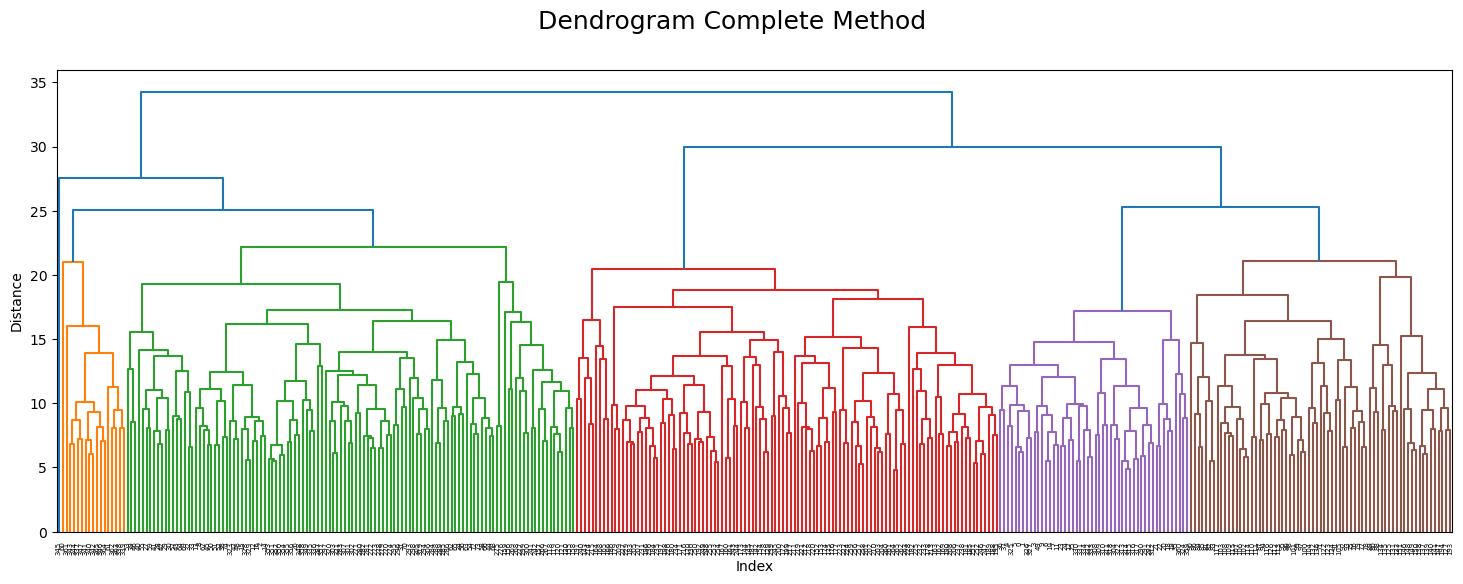

In [36]:
distance_complete = linkage(df_scaled,method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

##### The complete method looks for the longest distance between two points in a cluster to determine their group. Here we see 5 groups on the merged dataset.

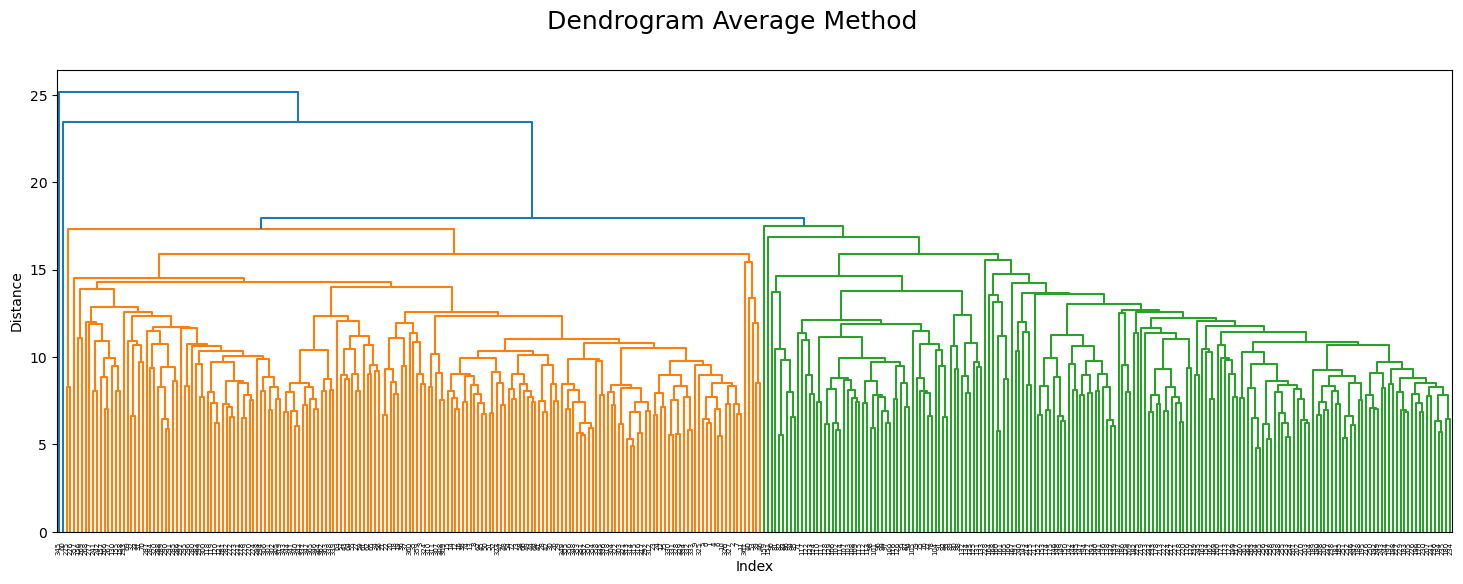

In [39]:
distance_average = linkage(df_scaled,method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

##### The Average method looks for the average distance between two points in a cluster to determine their group. Here the data has been grouped into two clusters.

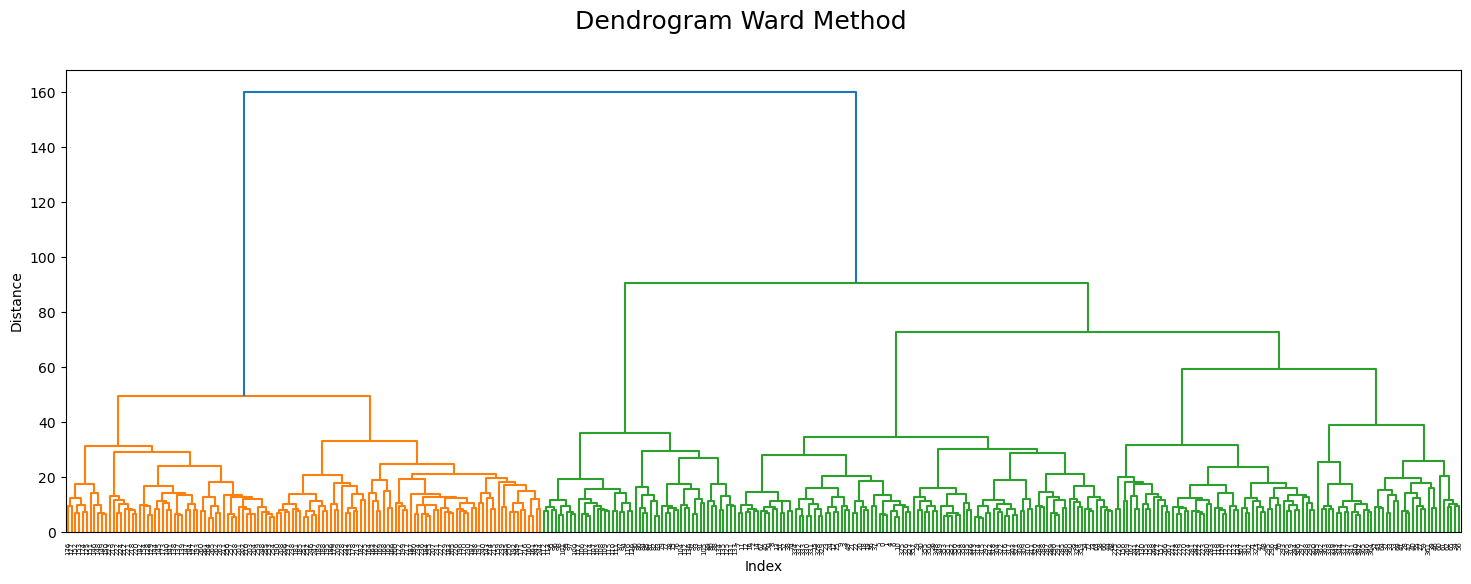

In [42]:
distance_ward = linkage(df_scaled,method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

##### The Ward method uses something called the minimum distance of the sum of squares and tries to minimize the variance between the two clusters. Two distinct groups are presented with the merged data using the Ward method.


### Plot Clusters of Complete Linkage Method

In [48]:
#Use fcluster to create cluster assignments based on the complete linkage method
df_scaled_CM=df_scaled.copy()

df_scaled_CM['clust2']=fcluster(distance_complete,2, criterion='maxclust')
df_scaled_CM['clust3']=fcluster(distance_complete,3, criterion='maxclust')
df_scaled_CM['clust4']=fcluster(distance_complete,4, criterion='maxclust')
df_scaled_CM['clust5']=fcluster(distance_complete,4, criterion='maxclust')
df_scaled_CM.head(1)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3,clust4,clust5
21915,-1.960538,-0.321292,1.201295,1.910115,-0.711243,-0.486323,0.0,0.185369,-1.822856,-1.817976,-1.721519,-0.615615,1.110223e-16,1.983293,-2.293811,-0.320358,-1.146207,-1.532505,-1.609425,-1.417438,0.0,0.0,2.220446e-16,0.0,-0.327325,1.776357e-15,-1.199888,-1.093964,-1.164965,0.940837,-0.572478,1.734871,1.618151,-0.418026,-0.553697,-1.15087,-1.95823,-1.437623,-2.058325,-1.783191,-0.181045,0.971902,1.779045,-1.075058,-0.467633,0.0,0.094357,-1.783855,-1.529908,-1.729325,-0.32235,-0.983512,-0.315409,-0.070302,-1.206158,-1.428342,-1.085754,0.862301,1.201357,1.32964,-1.231654,-0.455483,0.0,-1.033905,-1.381399,-1.34567,-0.867613,4.440892e-16,2.220446e-16,2.220446e-16,-2.220446e-16,-2.775558e-17,0.0,1.776357e-15,1.776357e-15,3.552714e-15,-1.52494,-0.946485

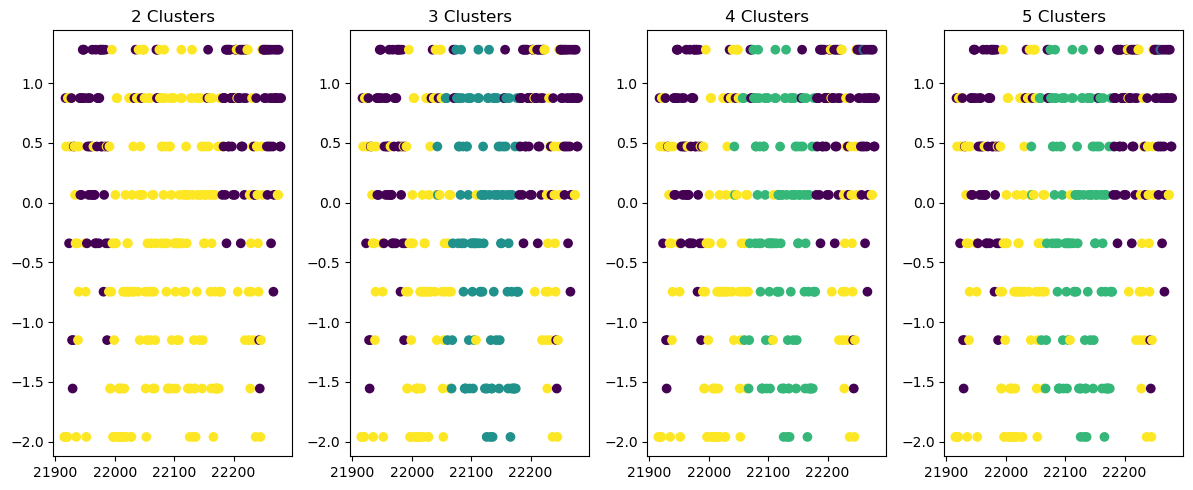

In [52]:
#Plot out distribution of clusters from the complete linkage method
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i, n_clusters in enumerate([2,3,4,5], 1):
    plt.subplot(1,5,i)
    plt.scatter(df_scaled_CM.index, df_scaled_CM.iloc[:,0], c=df_scaled_CM[f'clust{n_clusters}'], cmap='viridis')
    plt.title(f'{n_clusters} Clusters')
plt.tight_layout()
plt.show()


In [56]:
#Use silhouette method to see if a certain number of clusters could be more optimized
from sklearn.metrics import silhouette_score

for n_clusters in [2,3,4,5]:
    score = silhouette_score(df_scaled, df_scaled_CM[f'clust{n_clusters}'])
    print(f"Silhouette score for {n_clusters} clusters: {score:.3f}")


Silhouette score for 2 clusters: 0.132
Silhouette score for 3 clusters: 0.141
Silhouette score for 4 clusters: 0.141
Silhouette score for 5 clusters: 0.141


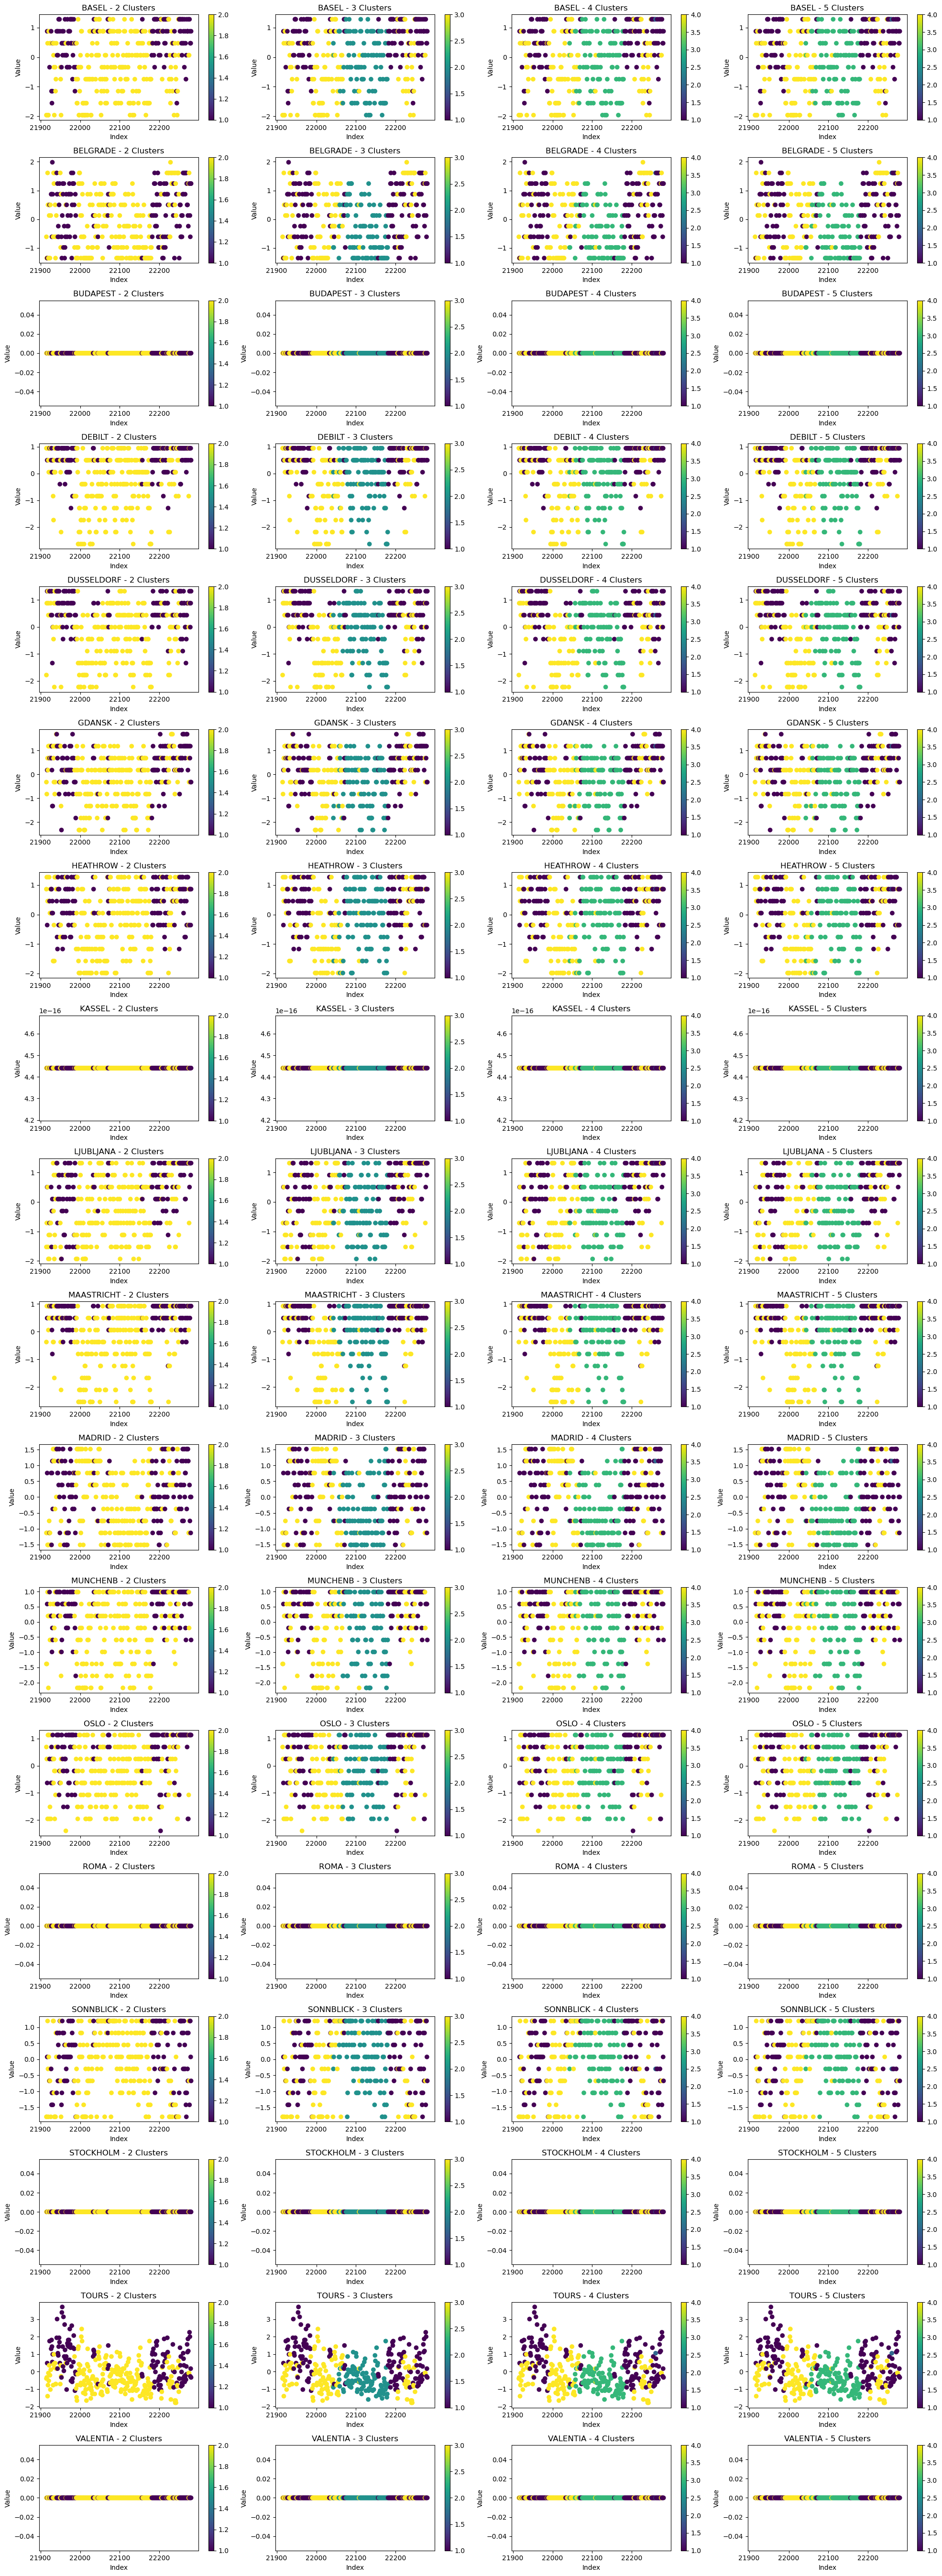

In [62]:
#Visualize clusters by each station

# Extract station names from column headers
locations = list({x.split("_")[0] for x in df_scaled_CM.columns if x not in ["clust2", "clust3", "clust4", 'clust5']})
locations.sort()

# Calculate grid dimensions
n_stations = len(locations)
n_cluster_solutions = 4  # For 2, 3, 4 & 5 clusters
n_cols = n_cluster_solutions
n_rows = n_stations

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows))

# Plot for each station
for i, station in enumerate(locations):
    station_columns = [col for col in df_scaled_CM.columns if col.startswith(station)]
    
    for j, n_clusters in enumerate([2, 3, 4, 5]):
        ax = axes[i, j]  # Use a different subplot for each cluster solution
        scatter = ax.scatter(df_scaled_CM.index, df_scaled_CM[station_columns[0]], 
                             c=df_scaled_CM[f'clust{n_clusters}'], cmap='viridis')
        ax.set_title(f'{station} - {n_clusters} Clusters')
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        
        # Add a colorbar
        plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


## 5. Run PCA

In [65]:
# Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Make a dataframe of the new components, using the same index as df_scaled
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'], index=df_scaled.index)

# Add the clusters to the dataframe
dfPCA['clust2'] = df_scaled_CM['clust2']
dfPCA['clust3'] = df_scaled_CM['clust3']
dfPCA['clust4'] = df_scaled_CM['clust4']
dfPCA['clust5'] = df_scaled_CM['clust5']
# Check the result
print(dfPCA.head())


            PCA1      PCA2  clust2  clust3  clust4  clust5
21915 -10.135447  5.622301       2       3       4       4
21916  -9.908051  3.080947       2       3       4       4
21917  -9.088067  1.126739       1       1       1       1
21918  -9.314776  1.911806       2       3       4       4
21919  -9.391231  4.033870       2       3       4       4


([<matplotlib.axis.XTick at 0x33c16c1a0>,
 [Text(0, 0, '-12.378177716577456'),
  Text(40, 0, '-8.995478581738903'),
  Text(80, 0, '-7.0630111921597445'),
  Text(120, 0, '-4.356573265219557'),
  Text(149, 0, '-3.2914040699370326')])

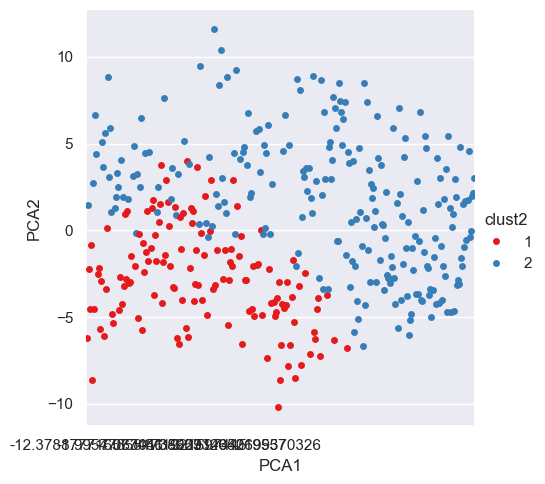

In [67]:
#PLot the two components, color coded by clusters
sns.set_theme()
g = sns.catplot(x='PCA1', y='PCA2', palette='Set1', hue='clust2', data=dfPCA)
plt.xticks([0, 40, 80, 120, 149])

In [69]:
# Run the PCA model, reducing to 1 component
pca = PCA(n_components=1)
principalComponents2 = pca.fit_transform(df_scaled)

# Make a dataframe of the new components, using the same index as df_scaled
dfPCA2 = pd.DataFrame(principalComponents2, columns=['PCA1'], index=df_scaled.index)

dfPCA2['y']= 0

# Add the clusters to the dataframe
dfPCA2['clust2'] = df_scaled_CM['clust2']
dfPCA2['clust3'] = df_scaled_CM['clust3']
dfPCA2['clust4'] = df_scaled_CM['clust4']

# Check the result
print(dfPCA2.head())

            PCA1  y  clust2  clust3  clust4
21915 -10.135447  0       2       3       4
21916  -9.908051  0       2       3       4
21917  -9.088067  0       1       1       1
21918  -9.314776  0       2       3       4
21919  -9.391231  0       2       3       4


([<matplotlib.axis.XTick at 0x3424103e0>,
 [Text(0, 0, '-12.378177716577456'),
  Text(40, 0, '-8.995478581738903'),
  Text(80, 0, '-7.0630111921597445'),
  Text(120, 0, '-4.356573265219557'),
  Text(149, 0, '-3.2914040699370326')])

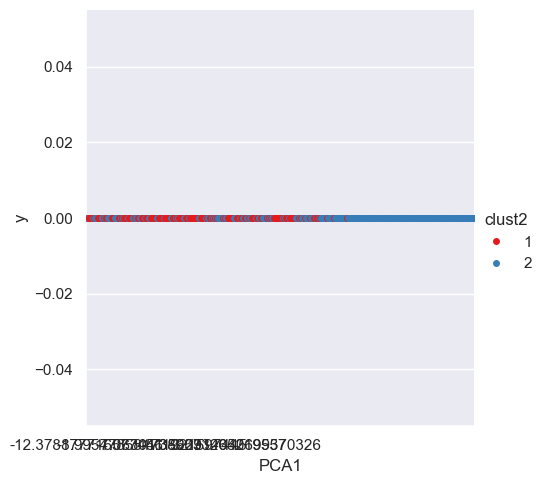

In [71]:
#PLot the two components, color coded by clusters
sns.set_theme()
g = sns.catplot(x='PCA1', y='y', palette='Set1', hue='clust2', data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

([<matplotlib.axis.XTick at 0x332d8cb60>,
 [Text(0, 0, '-12.378177716577456'),
  Text(40, 0, '-8.995478581738903'),
  Text(80, 0, '-7.0630111921597445'),
  Text(120, 0, '-4.356573265219557'),
  Text(149, 0, '-3.2914040699370326')])

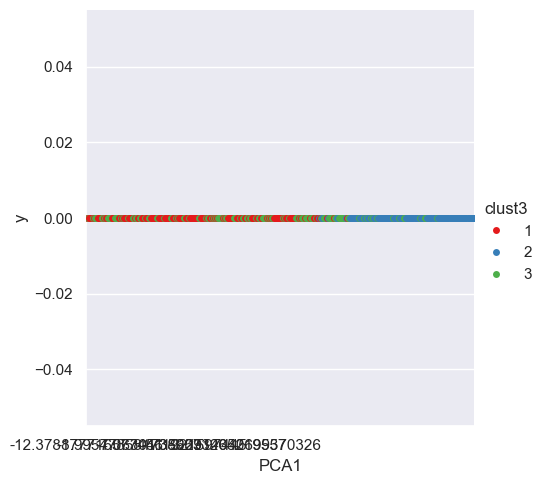

In [73]:
#PLot the two components, color coded by clusters
sns.set_theme()
g = sns.catplot(x='PCA1', y='y', palette='Set1', hue='clust3', data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

##### 2 Clusters seems to make the most sense

## 6. Reduce Datasets

In [228]:
#Dataset 1: Reduced Mean Temps for 15 Stations

#Reduce to just the mean temperatures (minus Roma, Tours, & Gdansk)
df_temps = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()
df_temps.head(1)

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5


In [234]:
climate.columns.unique().tolist()

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [242]:
#Dataset 2: Oslo & Valentia--All Features (to compare more opposing weather conditions)

df_osva = climate[['DATE', 'MONTH', 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']].copy()
df_osva.head(1)

,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [244]:
#Dataset 3: Oslo & Stockholm--ALL features (to compare more nuanced microclimates)

df_osst = climate[['DATE', 'MONTH', 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']].copy()
df_osst.head(1)

,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
0,19600101,1,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9


In [79]:
#DF4 - Oslo
df_oslo = climate[['DATE', 'MONTH', 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
]].copy()
df_oslo.shape

(22950, 13)

## 7. Export Reduced Datasets

In [246]:
df_temps.to_parquet(os.path.join(path,'01 Datasets', '02 Prepared Data', '02 Unsupervised', 'weather_means.parquet'))

In [248]:
df_osva.to_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', '02 Unsupervised', 'weather_osva.parquet'))

In [250]:
df_osst.to_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', '02 Unsupervised', 'weather_osst.parquet'))

In [81]:
df_oslo.to_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', '02 Unsupervised', 'weather_oslo.parquet'))